In [2]:

#Initialising Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
from IPython import display
from torchvision import transforms


In [3]:
# Function to find angle between two tensors
def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 296kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.0MB/s]


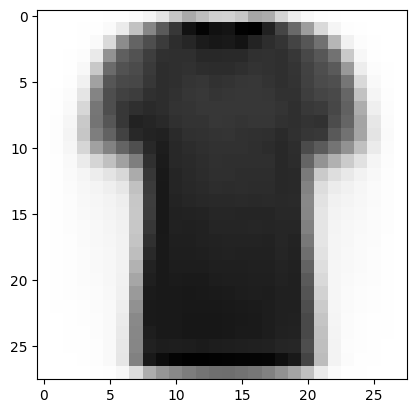

In [4]:
# Plotting average vectors of Fashion-MNIST class

trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

# Plot average T-shirt
image = ave_0.reshape(28, 28).cpu().numpy()
plt.imshow(image, cmap='Greys')
plt.show()

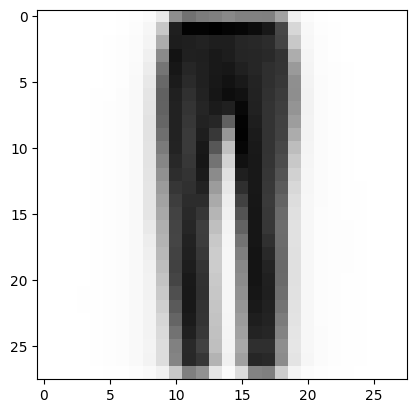

In [5]:
# Plot average trousers
image = ave_1.reshape(28, 28).cpu().numpy()
plt.imshow(image, cmap='Greys')
plt.show()

In [6]:
#Classification Accuracy
w = (ave_1 - ave_0).T
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -2000000

torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

<ipython-input-6-508361858935>:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  w = (ave_1 - ave_0).T


tensor(0.7775, dtype=torch.float64)

In [7]:
#Calculating Determinant of a Tensor
torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)

In [8]:
# Defining tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

In [9]:
# Reimplement matrix multiplication and einstein sum
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

In [10]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])